In [1]:
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

set_nb_theme('chesterish')

In [2]:
#load libraries 
import time,os
from matplotlib.offsetbox import AnchoredText
import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines , numpy as np,cupy as cp, math, pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#import cudf
#import ROOT
#from ROOT import TFile

#import root_pandas

#from toggle_cell import hide_cell 
import uproot3
%matplotlib inline

#presets for plot style
from scipy.constants import golden
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7/golden),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap('inferno', 12)
autumn = cm.get_cmap('autumn', 12)

#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
#tf.config.experimental.set_memory_growth(physical_devices[1], True)
rc = plt.rc
rc('text', usetex=False)
import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=False)
rc('font', size=18)
rc('xtick', labelsize=18)
rc('ytick', labelsize=18)
rc('legend', fontsize=18)
import root_pandas,glob

import gc

def read_n(pattern, n):
    if not '*' in pattern:
        a = root_pandas.read_root(pattern,chunksize=int(n))
    else:
        a = root_pandas.read_root(glob.glob(pattern),chunksize=int(n))
    for b in a:
        del a
        print(n)
        return b

from scipy.optimize import curve_fit

image_dir='images'

import misc_util

import jupyterthemes as jt
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

set_nb_theme('chesterish')

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'


/home/sebouh/.local/lib/python3.8/site-packages/uproot3/__init__.py:127: FutureWarning: Consider switching from 'uproot3' to 'uproot', since the new interface became the default in 2020.

    pip install -U uproot

In Python:

    >>> import uproot
    >>> with uproot.open(...) as file:
    ...

  warnings.warn(
/home/sebouh/.local/lib/python3.8/site-packages/awkward0/__init__.py:12: FutureWarning: Consider switching from 'awkward0' to 'awkward', since the new interface became the default in 2020.

    pip install -U awkward

In Python:

    >>> import awkward as ak
    >>> new_style_array = ak.from_awkward0(old_style_array)
    >>> old_style_array = ak.to_awkward0(new_style_array)

  warnings.warn(


In [3]:
dfs_mc = {a : root_pandas.read_root("MC_Pairs_%s.root" %a,a) for a in "Pb".split()}


#dfs_mc = {a : root_pandas.read_root("/home/sebouh/CreatePairTuples/MC_Pairs_weighted_%s.root" %a,'dihadrons') for a in "D_2pi C_2pi".split()}

colors = {'D':'k','C':'r','Fe':'g','Pb':'b'}

In [16]:
import R2h_module
import imp
imp.reload(R2h_module)
for key in list(dfs_mc.keys()):
    if '_2pi' in key or '_pi_p' in key:
        continue
    print(f"\n\n{key}")
    dfs_mc[key] = R2h_module.applyCuts(dfs_mc[key], nomCuts=True)
    dfs_mc[key + '_2pi'] = R2h_module.applyCutsPair(dfs_mc[key],
                                                             nomCuts=True,h2Proton=False)
    dfs_mc[key + '_pi_p'] = R2h_module.applyCutsPair(dfs_mc[key],
                                                             nomCuts=True,h2Proton=True)



Pb
Entries before cut  275796
Q2>1.0 and Q2<4.0 275796  (100.00  %)
h1_p<5.0  275794  (100.00  %)
inelasticity < 0.85 275794  (100.00  %)
h1_pid = pions (trigger) 90668  (32.88  %)
Nu>2.2 and Nu<4.2 88715  (97.85  %)
10< h1_th<120 88715  (100.00  %)
Theta/P fiducial region selected for trigger 88715  (100.00  %)
Nom cuts for the trigger applied 43438  (48.96  %)
Starting election on dipion variables
This is Data
Q2>1.0 : 43438  (100.00  %)
2.2 < nu < 4.2 43438  (100.00  %)
h1_p<5 GeV  43438  (100.00  %)
h2_p<5 GeV 43438  (100.00  %)
secondary hadrons are pions 19687  (45.32  %)
leading hadrons are pions 19687  (100.00  %)
0.2<h2_p<5.0 19687  (100.00  %)
0.2<h1_p<5.0 19687  (100.00  %)
10<h2_th<120 19687  (100.00  %)
Theta/P fiducial region selected 19687  (100.00  %)
10< h1_th<120 19687  (100.00  %)
Theta/P fiducial region selected for trigger 19687  (100.00  %)
Nom cuts for the pair applied (pi pi) 17639  (89.60  %)
Starting election on dipion variables
This is Data
Q2>1.0 : 43438  

In [17]:
dfs_mc['Pb_2pi'].columns

Index(['dphi', 'dphi_lab', 'drap', 'h1_z', 'h2_z', 'h1_cm_pt', 'h2_cm_pt',
       'h1_xf', 'h2_xf', 'h1_rap', 'ycm', 'h2_rap', 'h1_pid', 'h2_pid',
       'h1_cm_ph', 'h2_cm_ph', 'h1_cm_th', 'h2_cm_th', 'pair_mass', 'pair_pt',
       'mx_eh1h2x', 'mx_eh1x', 'mx_eh2x', 't', 'Q2', 'nu', 'W', 'SampFracEl25',
       'SampFracEl20', 'TargTypeSM', 'TargType', 'x', 'u', 'h1_ph', 'h1_th',
       'h2_ph', 'h2_th', 'h1_deltaZ', 'h2_deltaZ', 'h1_Nphe', 'h2_Nphe',
       'h1_Sector', 'h2_Sector', 'h1_FidCut', 'h2_FidCut', 'h1_Chi2CC',
       'h2_Chi2CC', 'h1_StatCC', 'h2_StatCC', 'evnt', 'dphi_truth',
       'dphi_lab_truth', 'drap_truth', 'h1_truth_z', 'h2_truth_z',
       'h1_truth_cm_pt', 'h2_truth_cm_pt', 'h1_truth_xf', 'h2_truth_xf',
       'h1_truth_rap', 'ycm_truth', 'h2_truth_rap', 'h1_truth_pid',
       'h2_truth_pid', 'h1_truth_cm_ph', 'h2_truth_cm_ph', 'h1_truth_cm_th',
       'h2_truth_cm_th', 'pair_mass_truth', 'pair_pt_truth', 'mx_eh1h2x_truth',
       'mx_eh1x_truth', 'mx_eh2x_truth'

In [18]:
import os
os.mkdir('images/particle_misid/')

FileExistsError: [Errno 17] File exists: 'images/particle_misid/'

In [22]:
particle_names = {11:'$e$',13:'$\\mu$',211:'$\\pi$', 321:'$K$', 2212:'$p$',9999:'unknown', -1:'tot. mis-id.'}
def idplot(slicevar,particle,target='D', slices=None, xlabel=None, ylabel=None, query=None, window = None,
           fillstyle=None,blankLabel=False,showLegend=True):
    for key in dfs_mc.keys():
        
        if '_' in key: continue
        if target not in key: continue
        df = dfs_mc[key+'_2pi']
    
        if slices is None:
            yy = df.eval(slicevar)
            slices = np.linspace(yy.quantile(.005), yy.quantile(.995), 10)
        
        if 'pass_recon' in df.keys():
            df = df.query('pass_recon')
        if query is not None:
            df = df.query(query)
            
        xx = df.eval(slicevar)
        if window is None:
            window = xx.quantile(0.005),xx.quantile(.995)
        slices = np.linspace(*window,10)
        
        xs = {}
        ys = {}
        dys = {}
        
        colors = {11:'k', 9999:'g',-1:'k',2212:'r',321:'b'}
        for j,truth_id in enumerate((2212,321,9999,-1)):
            shift = (slices[1]-slices[0])*j/7
            xs[truth_id] = []
            ys[truth_id] = []
            dys[truth_id] = []
            for i in range(len(slices)-1):
                df_slice = df.query(f'{slicevar}>{slices[i]} and {slicevar}<{slices[i+1]}')
                
                xs[truth_id].append((slices[i]+slices[i+1])/2)
                q_id = f'abs({particle}_truth_pid) == {truth_id}' if truth_id != -1\
                            else f'{particle}_truth_pid != {particle}_pid'
                n,d = len(df_slice.query(q_id)),len(df_slice)
                ys[truth_id].append(n/d)
                dys[truth_id].append(np.sqrt(n*(d-n))/d**(3/2))
            plt.errorbar(xs[truth_id]+shift,ys[truth_id],dys[truth_id], marker='o',linestyle='',
                             label=particle_names[truth_id] if not blankLabel else ' ',
                             color = colors[truth_id],fillstyle=fillstyle)
    plt.gca().set_ylabel('fraction of events')
    plt.gca().set_xlabel(xlabel)
    plt.gca().set_ylim(1e-5,1)
    plt.gca().set_yscale('log')
    #plt.gca().axhline(0,color='0.7', linestyle='--')
    #plt.gca().axvline(0,color='0.7', linestyle='--')
    if showLegend:
        plt.legend()

In [23]:
def multipanel(slicevar, particles= 'h1 h2'.split(), titles='trigger associated'.split(),*varg,**kwarg):
    
    fig,axs = plt.subplots(2,len(particles), figsize=(6*len(particles), 10))
    for nucleus,fillstyle,label in ('Pb','full',True),:#('Pb','none',True):
        for i,particle in enumerate(particles):
            plt.sca(axs[0][i])
            plt.gca().set_title(titles[i])
            idplot(slicevar,particle,**kwarg, query=f'{particle}_pid == 211', target=nucleus, fillstyle=fillstyle,blankLabel=not label, showLegend=(i==1))
            plt.gca().set_xlabel(None)
            plt.sca(axs[1][i])
            idplot(slicevar,particle,**kwarg, query=f'{particle}_pid == -211', target=nucleus, fillstyle=fillstyle,blankLabel=not label,showLegend=False)
            if i != 0:
                axs[0][i].set_ylabel(None)
                axs[1][i].set_ylabel(None)
                
    axs[0][0].text(0,0.9,'identified as $\pi^+$',transform=axs[0][0].transAxes)
    axs[1][0].text(0,0.9,'identified as $\pi^-$',transform=axs[1][0].transAxes)
    fig.tight_layout()

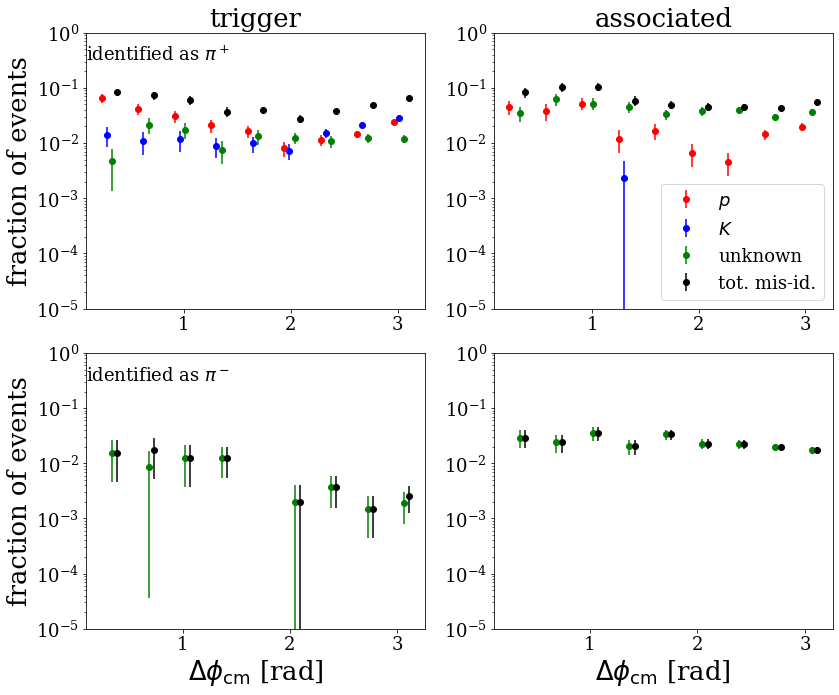

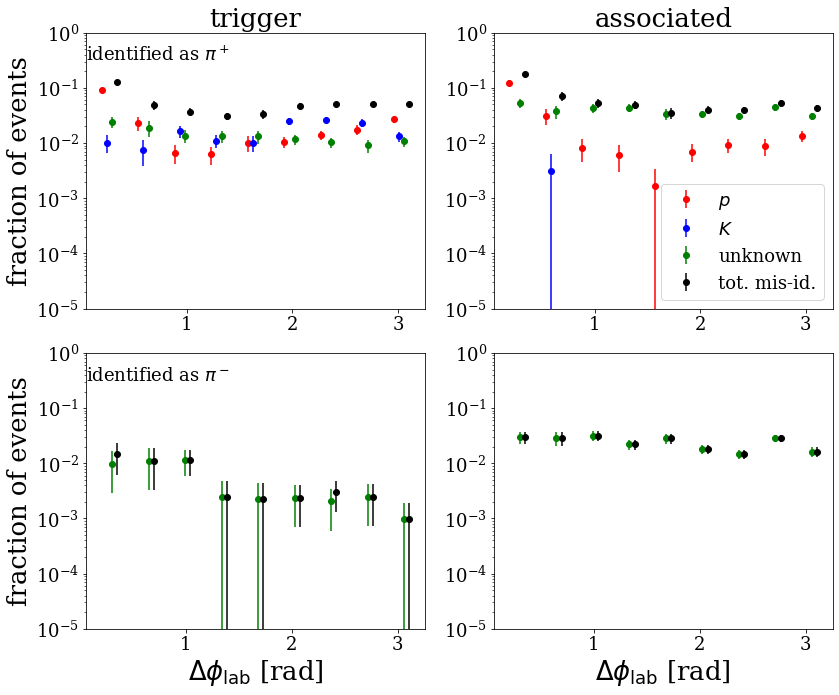

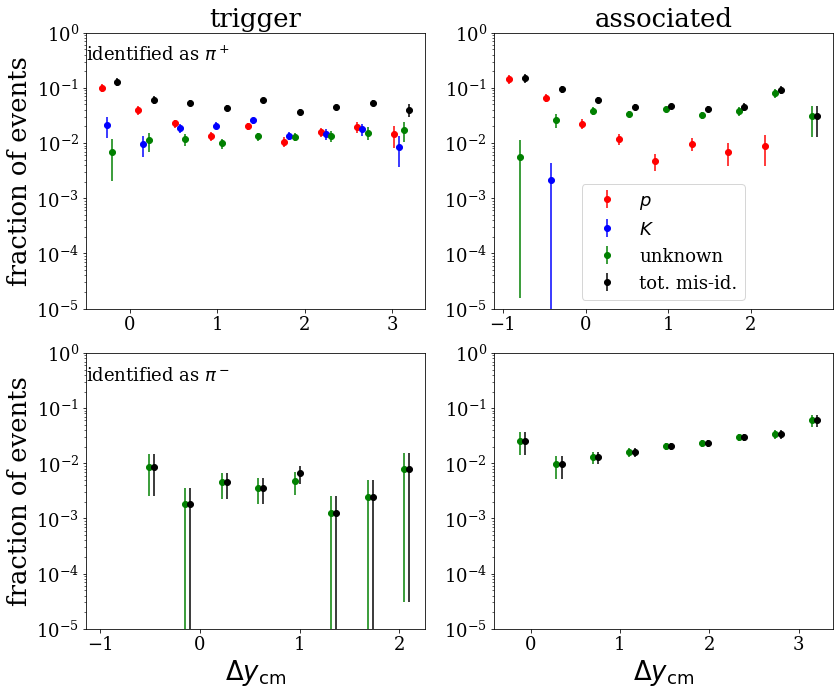

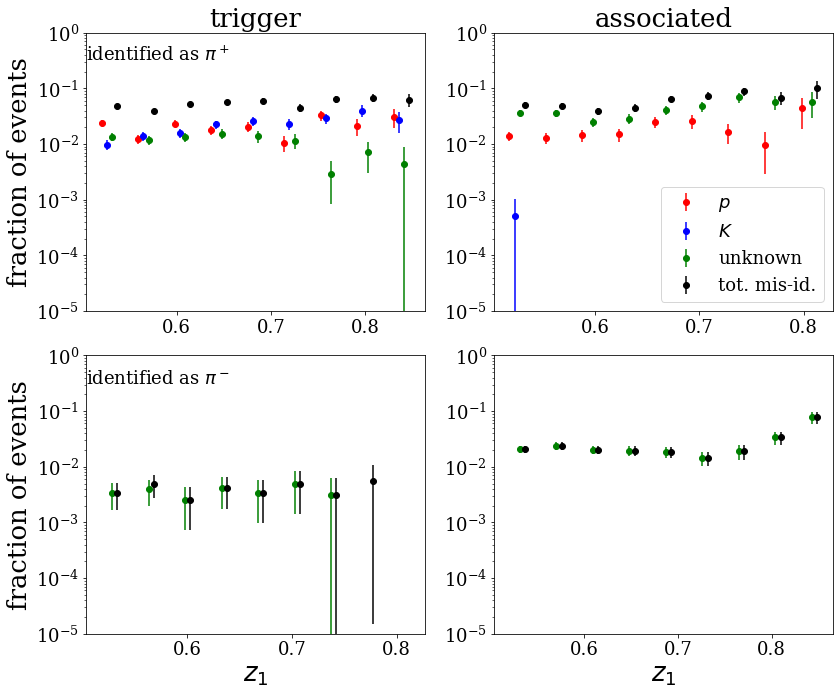

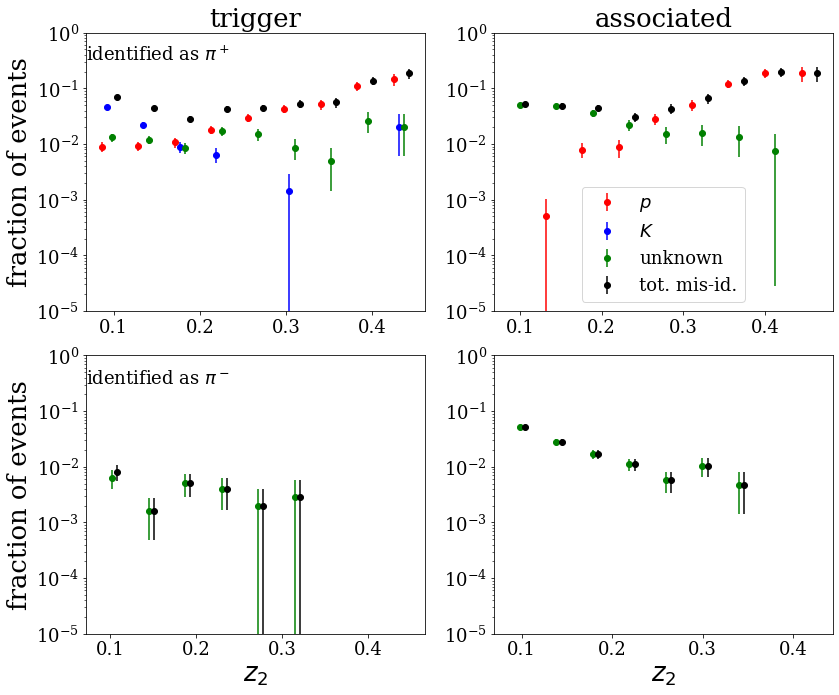

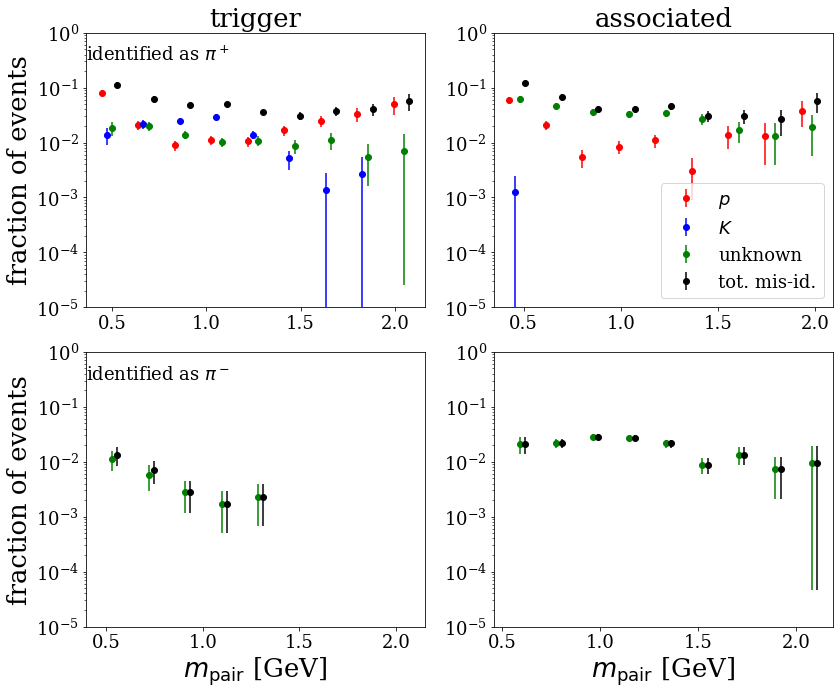

In [24]:
multipanel('dphi',xlabel='$\Delta\phi_{\mathrm{cm}}$ [rad]')
plt.savefig('images/particle_misid/misid_dphi_cm.png',bbox_inches='tight')
plt.show()
multipanel('dphi_lab',xlabel= '$\Delta \phi_{\mathrm{lab}}$ [rad]')
plt.savefig('images/particle_misid/misid_dphi_lab.png',bbox_inches='tight')
plt.show()
multipanel('drap', xlabel='$\Delta y_{\mathrm{cm}}$')
plt.savefig('images/particle_misid/misid_drap.png',bbox_inches='tight')
plt.show()
multipanel('h1_z', xlabel='$z_1$')
plt.savefig('images/particle_misid/misid_z1.png',bbox_inches='tight')
plt.show()
multipanel('h2_z', xlabel='$z_2$')
plt.savefig('images/particle_misid/misid_z2.png',bbox_inches='tight')
plt.show()
multipanel('pair_mass', xlabel='$m_{\mathrm{pair}}$ [GeV]')
plt.savefig('images/particle_misid/misid_pair_mass.png',bbox_inches='tight')
plt.show()


In [51]:
print(list(dfs_mc['D_2pi'].columns))

KeyError: 'D_2pi'

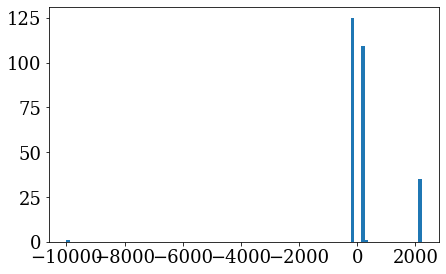

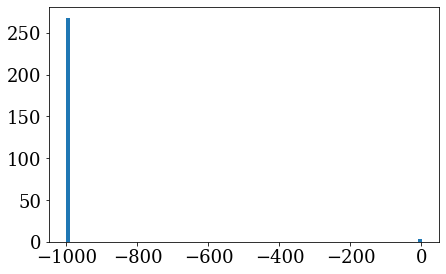

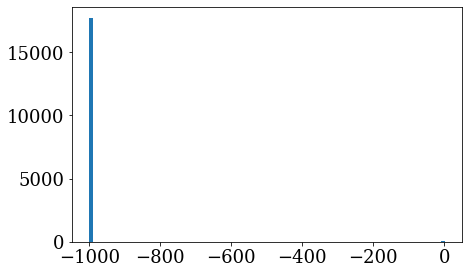

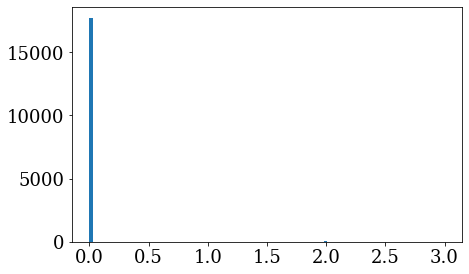

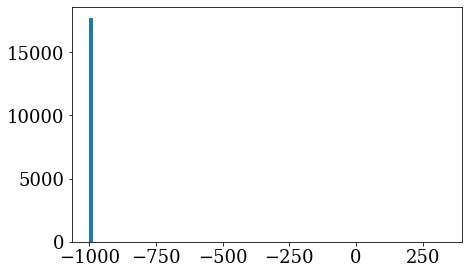

In [27]:
plt.hist(dfs_mc['Pb_2pi'].query('h2_z>0.4').h2_truth_pid,bins=100)
plt.show()
plt.hist(dfs_mc['Pb_2pi'].query('h2_z>0.4').h2_Chi2CC,bins=100)
#hist2d()
plt.show()

plt.hist(dfs_mc['Pb'].query('h2_z>0.4').h2_Chi2CC,bins=100)
plt.show()
plt.hist(dfs_mc['Pb'].query('h2_z>0.4').h2_StatCC,bins=100)
plt.show()
plt.hist(dfs_mc['Pb'].query('h2_z>0.4').h2_Nphe,bins=100)
plt.show()